## Vishal Kumar
## 226101005

# Question 1

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#We load data1.csv into pandas

file = 'Train_file.csv'
train_data = pd.read_csv(file)

file = 'Test_file.csv'
test_data = pd.read_csv(file)


In [2]:
train = train_data.to_numpy() # converted into numpy array
test  =test_data.to_numpy()

In [3]:
X_train = train[:,0:60]  ## training features
Y_train = train[:,60]  ## training target
n = len(Y_train)

In [4]:
w = np.zeros((X_train.shape[1])).reshape(-1, 1) # initialization of weight
b = 0
learning_rate = 0.01
error = []
epoch = []
errors = []

for j in range(60): # number of iterations
    for i in range(X_train.shape[0]): # training the network on given data
        x = X_train[i].reshape(-1, 1)
        y = Y_train[i]
        u = np.dot(w.T, x) + b # w*x+b
        y_hat = np.reciprocal(1 + np.exp(-u)) # activation function
        err = y - y_hat 
        error.append(err)
        w += learning_rate * err * y_hat * (1 - y_hat) * x # weight updation
        b += learning_rate * err * y_hat * (1 - y_hat) # bias updation
    errors.append(np.mean(np.power(error, 2)))
    epoch.append(j)


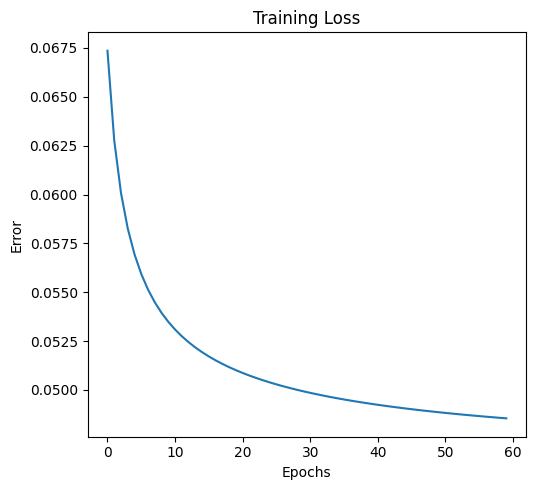

In [5]:
plt.figure(figsize=(10, 5)) # set the figure size
plt.subplot(1, 2, 1) # create a subplot
plt.plot(epoch, errors) # plot the errors
plt.xlabel('Epochs') # add x-axis label
plt.ylabel('Error') # add y-axis label
plt.title('Training Loss') # add title

plt.tight_layout() # adjust the layout of subplots

plt.show() # display the plot


In [6]:
X_test = test[:, 0:60] # extract features for testing
Y_test = test[:, 60] # extract labels for testing
n_test = len(Y_test) # get number of testing instances


In [7]:
classes = []
v = []

for i in range(X_test.shape[0]):
    x = X_test[i].reshape(-1, 1)
    y = Y_test[i]
    u = np.dot(w.T, x) + b
    y_hat = np.reciprocal(1 + np.exp(-u))
    v.append(y_hat)
    
    if y_hat > 0.6:
        classes.append(1)
    else:
        classes.append(0)


In [8]:
True_0 = 0
False_0 = 0
True_1 = 0
False_1 = 0

for i in range(X_test.shape[0]):
    if classes[i] == Y_test[i] and Y_test[i] == 0:
        True_0 += 1
    elif classes[i] != Y_test[i] and Y_test[i] == 0:
        False_0 += 1
    elif classes[i] == Y_test[i] and Y_test[i] == 1:
        True_1 += 1
    elif classes[i] != Y_test[i] and Y_test[i] == 1:
        False_1 += 1

print("True_0:", True_0)
print("True_1:", True_1)
print("False_0:", False_0)
print("False_1:", False_1)


True_0: 10055
True_1: 9985
False_0: 643
False_1: 832


In [9]:
True_positive=True_0+True_1
True_negative=False_0+False_1

False_positive= False_0
False_negative=False_1

In [10]:
Precision=True_positive/(True_positive+False_positive)
Recall=True_positive/(True_positive+False_negative)

In [11]:
F1_score=(2*Precision*Recall)/(Precision+Recall)

In [12]:
print("F1_score",F1_score)

F1_score 0.9645048730598003


# Question 2

In [13]:
file_path="MiniBooNE_PID.txt"

In [14]:
z=[]
with open(file_path) as f:
    first_line=f.readline()
    for line in f:
        x=line.strip()
        chunks=[x[i:i+12] for i in range(0,len(x),14)]
        y=[[float(i)] for i in chunks]
        z.append(y)

In [15]:
z=np.array(z)  ##converting z into numpy array

In [16]:
z.shape

(130064, 50, 1)

In [17]:
z=z.reshape(130064,50)

In [18]:
first_line.strip() ## number of data from two class

'36499 93565'

In [19]:
num=[int(i) for i in first_line.strip().split()] ### converting string into array
num


[36499, 93565]

In [20]:
total=num[0]+num[1]  ## total data

In [21]:
D_tst = []
y_tst1 = []
y_tst2 = []
D_trn = []
y_trn1 = []
y_trn2 = []
sample = 11000

# preparing data for processing
for i in range(total):
    if i < sample:
        D_tst.append(z[i])
        y_tst1.append(0)
    elif i >= num[0] and i < num[0] + sample:
        D_tst.append(z[i])
        y_tst2.append(1)
    elif i >= sample and i < num[0]:
        D_trn.append(z[i])
        y_trn1.append(0)
    else:
        D_trn.append(z[i])
        y_trn2.append(1)


In [22]:
from sklearn.linear_model import Perceptron ### perceptron scikit learn inbuilt function

y_trn=y_trn1+y_trn2
y_tst=y_tst1+y_tst2

mlp=Perceptron(max_iter=500)
mlp.out_activation_='softmax'  ### softmax is not defined so substitute separately

mlp.fit(D_trn,y_trn)

Perceptron(max_iter=500)

In [23]:
y_pred = mlp.predict(D_tst)

In [24]:
count=0
n_count=0
for i in range(len(y_pred)):
  if y_pred[i]==y_tst[i]:
    count=count+1
  else:
    n_count=n_count+1

count

15418

In [25]:
n_count

6582

In [26]:
from sklearn.metrics import f1_score,accuracy_score
class_f1_score=f1_score(y_pred,y_tst,average=None)
print(class_f1_score)

[0.64079895 0.74365166]


In [27]:
overall_accuracy=accuracy_score(y_tst,y_pred)
print(overall_accuracy)

0.7008181818181818


# Question 3

In [1]:
from sklearn.datasets import fetch_openml


In [2]:

# Download MNIST dataset
mnist = fetch_openml('mnist_784')

# Print dataset shape
print(mnist.data.shape)
print(mnist.target.shape)


(70000, 784)
(70000,)


In [3]:
x = mnist.data
y = mnist.target

In [4]:
# Scale data to [-1, 1] - This is of major importance!!!
x = x/255.0*2 - 1

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state=42)

In [6]:
x_train.shape

(46900, 784)

In [7]:
y_test.shape

(23100,)

In [8]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(100,),max_iter=100,activation='relu',solver='adam')

In [9]:
from sklearn.linear_model import Perceptron
mlp=Perceptron(max_iter=500)

In [10]:
###### adding softmax function at the output layer
mlp.out_activation_='softmax'

In [11]:
mlp.fit(x_train,y_train)

Perceptron(max_iter=500)

In [12]:
y_pred = mlp.predict(x_test)

In [13]:
from sklearn.metrics import f1_score,accuracy_score

In [14]:
class_f1_score=f1_score(y_test,y_pred,average=None)

In [15]:
print(class_f1_score)

[0.95525073 0.96558391 0.85928326 0.80167736 0.82572449 0.80690595
 0.91906597 0.91545073 0.81742919 0.81177606]


In [16]:
overall_accuracy=accuracy_score(y_test,y_pred)

In [17]:
print(overall_accuracy)

0.8700865800865801


## visualization of weight vector


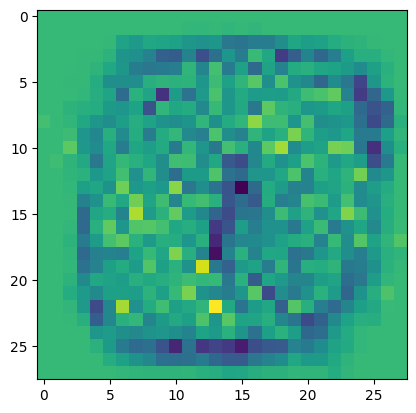

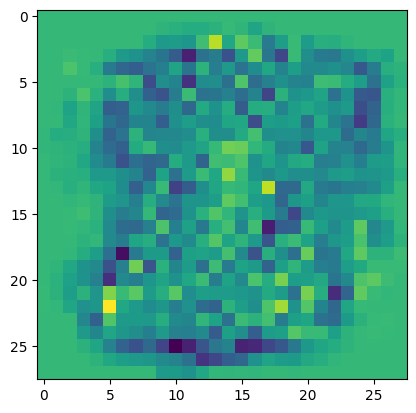

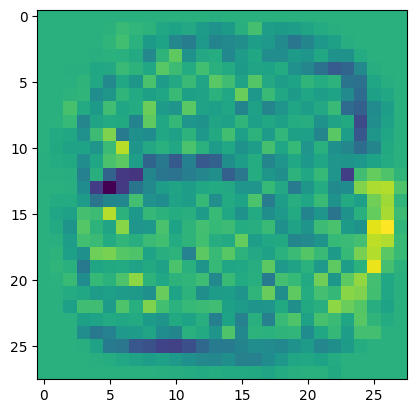

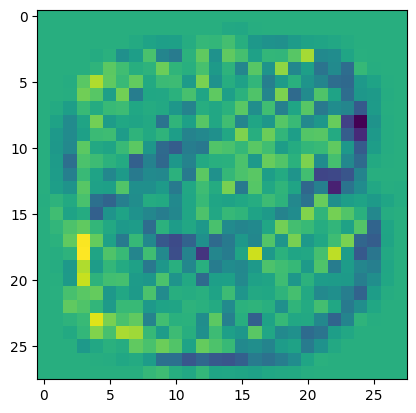

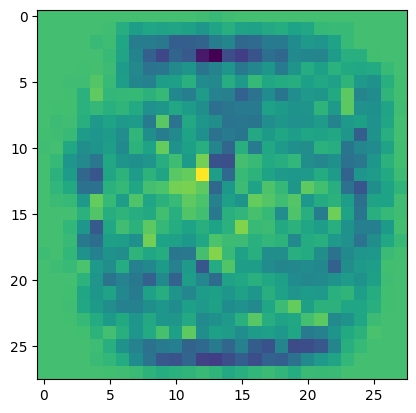

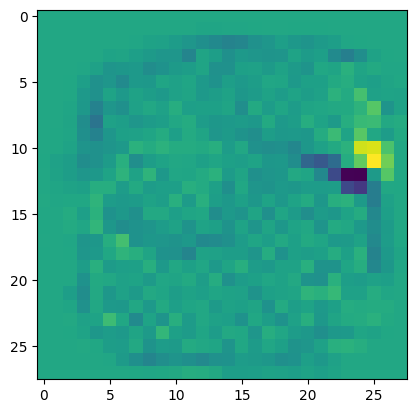

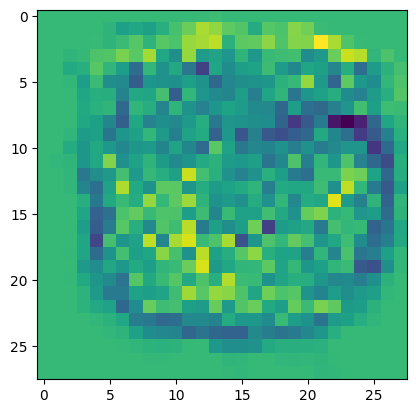

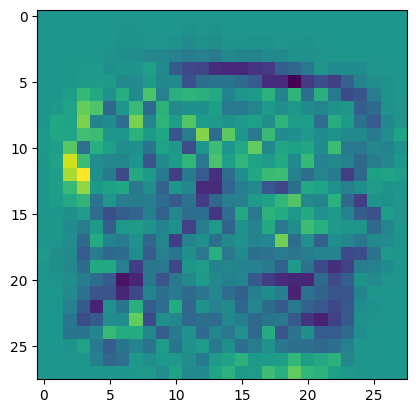

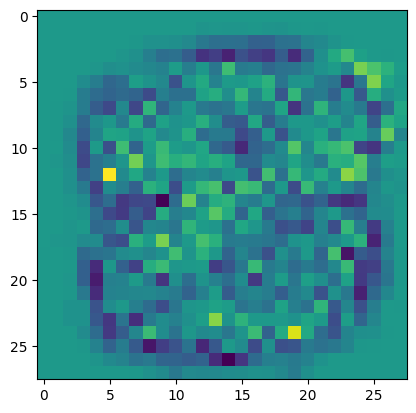

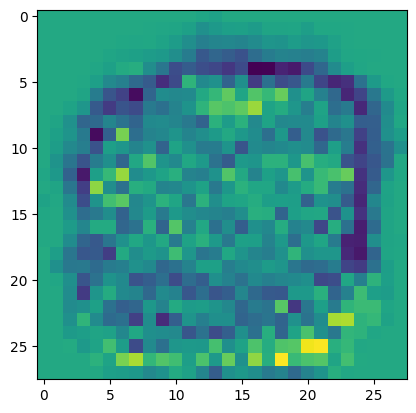

In [20]:
weights=mlp.coef_
for i in range(10):
  plt.imshow(weights[i].reshape(28,28))
  plt.show()